# Decisión Tree | Random Fores

In [1]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#Modelado y evaluación
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append("../../")
from src import funciones as fun
from src import variables as var

In [2]:
df_desbal = pd.read_pickle('../archivos/telco_churn_prep.pkl')
df_desbal.head()

,tenure,monthlycharges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phoneservice_No,phoneservice_Yes,...,paperlessbilling_No,paperlessbilling_Yes,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,contract,paymentmethod,churn
0,-1.280248,-1.161694,1,0,0,1,1,0,1,0,...,0,1,0,1,1,1,1,2,2,No
1,0.064303,-0.260878,0,1,1,0,1,0,0,1,...,1,0,0,0,2,0,1,1,1,No
2,-1.239504,-0.363923,0,1,1,0,1,0,0,1,...,0,1,0,0,1,1,1,2,1,Yes
3,0.512486,-0.747850,0,1,1,0,1,0,1,0,...,1,0,0,0,2,0,0,1,1,No
4,-1.239504,0.196178,1,0,1,0,1,0,0,1,...,0,1,1,1,2,1,1,2,2,Yes


In [3]:
mapa_churn = {'Yes': 1, 'No': 0}

In [4]:
df_desbal['churn'] = df_desbal['churn'].map(mapa_churn)

In [5]:
df_bal = pd.read_pickle('../archivos/balanceado.pkl')
df_bal.head()

,tenure,monthlycharges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phoneservice_No,phoneservice_Yes,...,paperlessbilling_No,paperlessbilling_Yes,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,contract,paymentmethod,churn
0,1.571829,1.020541,0,1,0,1,1,0,0,1,...,0,1,1,1,1,0,0,0,1,0
1,1.245878,0.515286,1,0,1,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
2,0.838438,0.952398,1,0,0,1,1,0,0,1,...,0,1,1,1,2,1,0,1,2,0
3,-0.832064,0.503652,0,1,1,0,1,0,0,1,...,0,1,1,1,2,1,1,2,1,0
4,-0.750577,-1.510719,0,1,1,0,1,0,0,1,...,1,0,0,0,0,0,0,1,1,0


### Decisión Tree:

In [6]:
Xd1 = df_desbal.drop("churn", axis = 1)
yd1 = df_desbal["churn"]

In [7]:
xd_train1, xd_test1, yd_train1, yd_test1 = train_test_split(Xd1, yd1, test_size = 0.2, random_state = 42)

In [8]:
arbol1 = DecisionTreeClassifier(random_state =0)

In [9]:
arbol1.fit(xd_train1, yd_train1)

DecisionTreeClassifier(random_state=0)

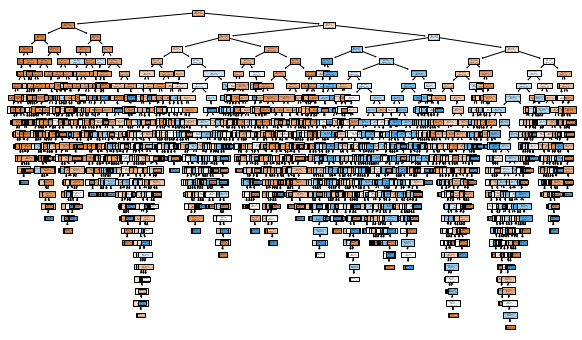

In [10]:
fig = plt.figure(figsize = (10,6))

tree.plot_tree(arbol1, feature_names = xd_train1.columns, filled = True)

plt.show()

In [11]:
max_features = np.sqrt(len(xd_train1.columns))
max_features

5.0

In [12]:
print(arbol1.tree_.max_depth)

26


In [13]:
yd_pred_test_esta = arbol1.predict(xd_test1)
yd_pred_train_esta = arbol1.predict(xd_train1)

In [14]:
dtd_results1 = fun.metricas(yd_test1, yd_pred_test_esta, yd_train1, yd_pred_train_esta, "D.Tree desbalanceado I")
dtd_results1

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.719972,0.474747,0.502674,0.488312,0.295769,test,D.Tree desbalanceado I
1,0.996800,0.998650,0.989298,0.993952,0.991776,train,D.Tree desbalanceado I


*El valor de kapppa es muy bajo, indicandonos que nuestro modelo está acertando por puro azar*
- Probamos primero a hacer el modelo con los datos balanceados:

In [15]:
Xb1 = df_bal.drop("churn", axis = 1)
yb1 = df_bal["churn"]

In [16]:
xb_train1, xb_test1, yb_train1, yb_test1 = train_test_split(Xb1, yb1, test_size = 0.2, random_state = 42)

In [17]:
arbol2 = DecisionTreeClassifier(random_state =0)

In [18]:
arbol2.fit(xb_train1, yb_train1)

DecisionTreeClassifier(random_state=0)

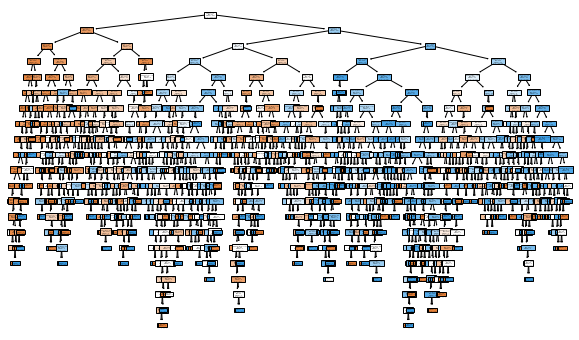

In [19]:
fig = plt.figure(figsize = (10,6))

tree.plot_tree(arbol2, feature_names = xb_train1.columns, filled = True)

plt.show()

In [20]:
max_features = np.sqrt(len(xb_train1.columns))
max_features

5.0

In [21]:
print(arbol2.tree_.max_depth)

20


In [22]:
yb_pred_test= arbol2.predict(xb_test1)
yb_pred_train= arbol2.predict(xb_train1)

In [23]:
dtb_results1 = fun.metricas(yb_test1, yb_pred_test, yb_train1, yb_pred_train, "D.Tree balanceado I")
dtb_results1

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.687166,0.697947,0.644986,0.670423,0.373593,test,D.Tree balanceado I
1,0.997324,1.000000,0.994667,0.997326,0.994649,train,D.Tree balanceado I


In [24]:
df_decisiontree = pd.concat([dtd_results1, dtb_results1], axis=0)

In [25]:
df_decisiontree

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.719972,0.474747,0.502674,0.488312,0.295769,test,D.Tree desbalanceado I
1,0.996800,0.998650,0.989298,0.993952,0.991776,train,D.Tree desbalanceado I
0,0.687166,0.697947,0.644986,0.670423,0.373593,test,D.Tree balanceado I
1,0.997324,1.000000,0.994667,0.997326,0.994649,train,D.Tree balanceado I


## Random Forest

In [26]:
df_desbal.head()

,tenure,monthlycharges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phoneservice_No,phoneservice_Yes,...,paperlessbilling_No,paperlessbilling_Yes,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,contract,paymentmethod,churn
0,-1.280248,-1.161694,1,0,0,1,1,0,1,0,...,0,1,0,1,1,1,1,2,2,0
1,0.064303,-0.260878,0,1,1,0,1,0,0,1,...,1,0,0,0,2,0,1,1,1,0
2,-1.239504,-0.363923,0,1,1,0,1,0,0,1,...,0,1,0,0,1,1,1,2,1,1
3,0.512486,-0.747850,0,1,1,0,1,0,1,0,...,1,0,0,0,2,0,0,1,1,0
4,-1.239504,0.196178,1,0,1,0,1,0,0,1,...,0,1,1,1,2,1,1,2,2,1


In [27]:
Xrd1 = df_desbal.drop("churn", axis = 1)
yrd1= df_desbal["churn"]

In [28]:
xrd_train1, xrd_test1, yrd_train1, yrd_test1 = train_test_split(Xrd1, yrd1, test_size = 0.2, random_state = 42)

In [32]:
param_rf = {"max_depth": [2,4, 6, 10, 12, 14],
        "max_features": [1,2,3,4],
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 

In [33]:
gs_rf = GridSearchCV(
            estimator=RandomForestClassifier(random_state=42), 
            param_grid= param_rf,
            cv=10, 
            verbose=-1)

In [34]:
gs_rf.fit(xrd_train1, yrd_train1)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 10, 12, 14],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             verbose=-1)

In [35]:
bosque = gs_rf.best_estimator_
bosque

RandomForestClassifier(max_depth=14, max_features=4, min_samples_leaf=10,
                       min_samples_split=100, random_state=42)

In [36]:
yrd_pred_test= bosque.predict(xrd_test1)
yrd_pred_train= bosque.predict(xrd_train1)

In [37]:
drf_results1 = fun.metricas(yrd_test1, yrd_pred_test, yrd_train1, yrd_pred_train, "R.Forest desbalanceado I")
drf_results1

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.787491,0.662338,0.409091,0.505785,0.379918,test,R.Forest desbalanceado I
1,0.817067,0.724903,0.502341,0.593441,0.480384,train,R.Forest desbalanceado I


In [38]:
df_bal.head()

,tenure,monthlycharges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phoneservice_No,phoneservice_Yes,...,paperlessbilling_No,paperlessbilling_Yes,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,contract,paymentmethod,churn
0,1.571829,1.020541,0,1,0,1,1,0,0,1,...,0,1,1,1,1,0,0,0,1,0
1,1.245878,0.515286,1,0,1,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
2,0.838438,0.952398,1,0,0,1,1,0,0,1,...,0,1,1,1,2,1,0,1,2,0
3,-0.832064,0.503652,0,1,1,0,1,0,0,1,...,0,1,1,1,2,1,1,2,1,0
4,-0.750577,-1.510719,0,1,1,0,1,0,0,1,...,1,0,0,0,0,0,0,1,1,0


In [39]:
Xrb1 = df_bal.drop("churn", axis = 1)
yrb1= df_bal["churn"]

In [40]:
xrb_train1, xrb_test1, yrb_train1, yrb_test1 = train_test_split(Xrb1, yrb1, test_size = 0.2, random_state = 42)

In [41]:
gs_rf.fit(xrb_train1, yrb_train1)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 10, 12, 14],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             verbose=-1)

In [42]:
bosqueb = gs_rf.best_estimator_
bosqueb

RandomForestClassifier(max_depth=14, max_features=4, min_samples_leaf=10,
                       min_samples_split=50, random_state=42)

In [43]:
yrb_pred_test= bosqueb.predict(xrb_test1)
yrb_pred_train= bosqueb.predict(xrb_train1)

In [44]:
brf_results1 = fun.metricas(yrb_test1, yrb_pred_test, yrb_train1, yrb_pred_train, "R.Forest balanceado I")
brf_results1

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.762032,0.744246,0.788618,0.765789,0.524353,test,R.Forest balanceado I
1,0.781940,0.760763,0.824667,0.791427,0.563752,train,R.Forest balanceado I


In [60]:
param_rf2 = {"max_depth": [14, 16, 18, 20],
        "max_features": [3,4, 5, 6],
        "min_samples_split": [5, 10, 50],
        "min_samples_leaf": [30,50,100]} 

In [61]:
gs_rf2 = GridSearchCV(
            estimator=RandomForestClassifier(random_state=42), 
            param_grid= param_rf2,
            cv=10, 
            verbose=-1)

In [64]:
Xrb2 = df_bal.drop("churn", axis = 1)
yrb2= df_bal["churn"]

In [65]:
xrb2_train, xrb2_test, yrb2_train, yrb2_test = train_test_split(Xrb2, yrb2, test_size = 0.2, random_state = 42)

In [66]:
gs_rf2.fit(xrb2_train, yrb2_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [14, 16, 18, 20],
                         'max_features': [3, 4, 5, 6],
                         'min_samples_leaf': [30, 50, 100],
                         'min_samples_split': [5, 10, 50]},
             verbose=-1)

In [51]:
bosqueb2 = gs_rf2.best_estimator_
bosqueb2

RandomForestClassifier(max_depth=14, max_features=5, min_samples_leaf=50,
                       min_samples_split=5, random_state=42)

In [55]:
yrb2_pred_test= bosqueb2.predict(xrb_test1)
yrb2_pred_train= bosqueb2.predict(xrb_train1)

In [59]:
brf_results2 = fun.metricas(yrb2_test, yrb2_pred_test, yrb2_train, yrb2_pred_train, "R.Forest balanceado II")
brf_results2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.756684,0.737913,0.785908,0.761155,0.513699,test,R.Forest balanceado II
1,0.768896,0.751711,0.805333,0.777599,0.537677,train,R.Forest balanceado II


### Generamos un dataframe con todas las métricas

In [68]:
df_met_rlog = pd.read_csv('../archivos/df_met_ajustes.csv', index_col=0)

In [69]:
df_metricas = pd.concat([df_met_rlog, df_decisiontree, drf_results1, brf_results1, brf_results2], axis=0)

In [71]:
df_metricas

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.767380,0.750643,0.791328,0.770449,0.535009,test,RLog balanceada
1,0.768227,0.749536,0.808000,0.777671,0.536328,train,RLog balanceada
0,0.788202,0.623377,0.513369,0.563050,0.424998,test,RLog desbalanceada
1,0.805156,0.658711,0.553846,0.601744,0.474047,train,RLog desbalanceada
0,0.719972,0.474747,0.502674,0.488312,0.295769,test,D.Tree desbalanceado I
1,0.996800,0.998650,0.989298,0.993952,0.991776,train,D.Tree desbalanceado I
0,0.687166,0.697947,0.644986,0.670423,0.373593,test,D.Tree balanceado I
1,0.997324,1.000000,0.994667,0.997326,0.994649,train,D.Tree balanceado I
0,0.787491,0.662338,0.409091,0.505785,0.379918,test,R.Forest desbalanceado I
1,0.817067,0.724903,0.502341,0.593441,0.480384,train,R.Forest desbalanceado I


In [72]:
df_metricas.to_csv('../archivos/metricas_reg_logística.csv')

*Analizando las métricas, valoramos la opcion de intentar mejorar el modelo D.Tree desbalanceado I jugando con los hiperparámetros*
- Por ello, decidimos probar un nuevo modelo de Decisión Tree con los datos sin balancear cambiado los parámetros para reducir el overfitting.

In [67]:
Xd2 = df_desbal.drop("churn", axis = 1)
yd2 = df_desbal["churn"]

In [ ]:
xd_train2, xd_test2, yd_train2, yd_test2 = train_test_split(Xd2, yd2, test_size = 0.2, random_state = 42)

In [ ]:
arbol2 = DecisionTreeClassifier(random_state =0)

In [ ]:
arbol2.fit(xd_train2, yd_train2)

DecisionTreeClassifier(random_state=0)

In [ ]:
max_features2 = np.sqrt(len(xd_train2.columns))
max_features2

5.0

In [ ]:
print(arbol2.tree_.max_depth)

26


In [ ]:
param2 = {"max_depth": [2, 4, 6, 10, 12, 14], 
        "max_features": [1,2,3,4],
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 

In [ ]:
gs_dt = GridSearchCV(
            estimator=DecisionTreeClassifier(random_state= 42),
            param_grid= param2, 
            cv=10, 
            verbose=-1) 

In [ ]:
gs_dt.fit(xd_train2, yd_train2)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 10, 12, 14],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             verbose=-1)

In [ ]:
mejor_modelo2 = gs_dt.best_estimator_
mejor_modelo2

DecisionTreeClassifier(max_depth=14, max_features=4, min_samples_leaf=10,
                       min_samples_split=50, random_state=42)

In [ ]:
yd_pred_test2 = mejor_modelo2.predict(xd_test2)
yd_pred_train2 = mejor_modelo2.predict(xd_train2)

In [ ]:
dtd_results2 = fun.metricas(yd_test2, yd_pred_test2, yd_train2, yd_pred_train2, "D.Tree desbalanceado II")
dtd_results2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.769723,0.581699,0.475936,0.523529,0.373698,test,D.Tree desbalanceado II
1,0.807111,0.670549,0.539130,0.597701,0.472807,train,D.Tree desbalanceado II


In [ ]:
param3 = {"max_depth": [2, 4, 6, 10, 12, 14], 
        "max_features": [4,5,6,7],
        "min_samples_split": [50, 100, 150],
        "min_samples_leaf": [5,10,50]} 

In [ ]:
gs_dt3 = GridSearchCV(
            estimator=DecisionTreeClassifier(random_state= 42),
            param_grid= param3, 
            cv=10, 
            verbose=-1) 

In [ ]:
gs_dt3.fit(xd_train2, yd_train2)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 10, 12, 14],
                         'max_features': [4, 5, 6, 7],
                         'min_samples_leaf': [5, 10, 50],
                         'min_samples_split': [50, 100, 150]},
             verbose=-1)

In [ ]:
mejor_modelo3 = gs_dt.best_estimator_
mejor_modelo3

DecisionTreeClassifier(max_depth=14, max_features=4, min_samples_leaf=10,
                       min_samples_split=50, random_state=42)

In [ ]:
yd_pred_test3 = mejor_modelo3.predict(xd_test2)
yd_pred_train3 = mejor_modelo3.predict(xd_train2)

In [ ]:
dtd_results3 = fun.metricas(yd_test2, yd_pred_test3, yd_train2, yd_pred_train3, "D.Tree desbalanceado III")
dtd_results3

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.769723,0.581699,0.475936,0.523529,0.373698,test,D.Tree desbalanceado III
1,0.807111,0.670549,0.539130,0.597701,0.472807,train,D.Tree desbalanceado III


In [ ]:
final_metricas = pd.concat([df_metricas,dtb_results1, dtd_results2, dtd_results3], axis=0 )
final_metricas

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.767380,0.750643,0.791328,0.770449,0.535009,test,RLog balanceada
1,0.768227,0.749536,0.808000,0.777671,0.536328,train,RLog balanceada
0,0.788202,0.623377,0.513369,0.563050,0.424998,test,RLog desbalanceada
1,0.805156,0.658711,0.553846,0.601744,0.474047,train,RLog desbalanceada
0,0.719972,0.474747,0.502674,0.488312,0.295769,test,D.Tree desbalanceado I
1,0.996800,0.998650,0.989298,0.993952,0.991776,train,D.Tree desbalanceado I
0,0.687166,0.697947,0.644986,0.670423,0.373593,test,D.Tree balanceado I
1,0.997324,1.000000,0.994667,0.997326,0.994649,train,D.Tree balanceado I
0,0.790334,0.645756,0.467914,0.542636,0.411094,test,R.Forest desbalanceado I
1,0.836089,0.747623,0.578595,0.652338,0.547371,train,R.Forest desbalanceado I
